In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [133]:
house = pd.read_csv('/Users/changlu/Desktop/kc_house_data.csv')

In [134]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [136]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [137]:
house.drop_duplicates(inplace=True)
house.drop('zipcode', axis=1, inplace=True)

In [138]:
columns_to_delete = ['id','lat', 'long']
house = house.drop(columns_to_delete, axis=1)

In [139]:
# Extract year from date and convert it to integer
house['year_sold'] = house['date'].apply(lambda x: int(x[:4]))

house['house_age'] = house['year_sold'] - house['yr_built']
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,house_age
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,59
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,63
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,82
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,49
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,28


Here we can see that the most correlated variables are sqft_living, grade and sqft_above. 

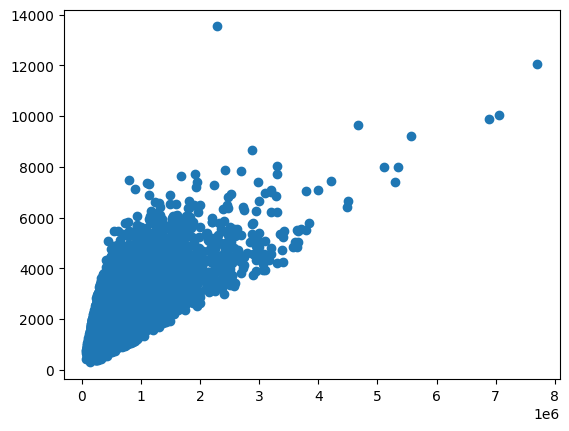

In [140]:
plt.scatter(house['price'],house['sqft_living'])

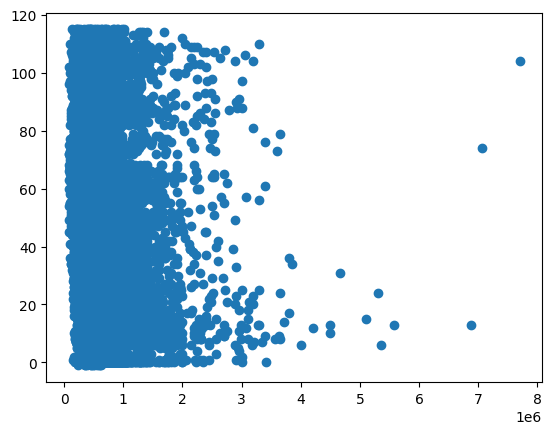

In [141]:
plt.scatter(house['price'],house['house_age'])

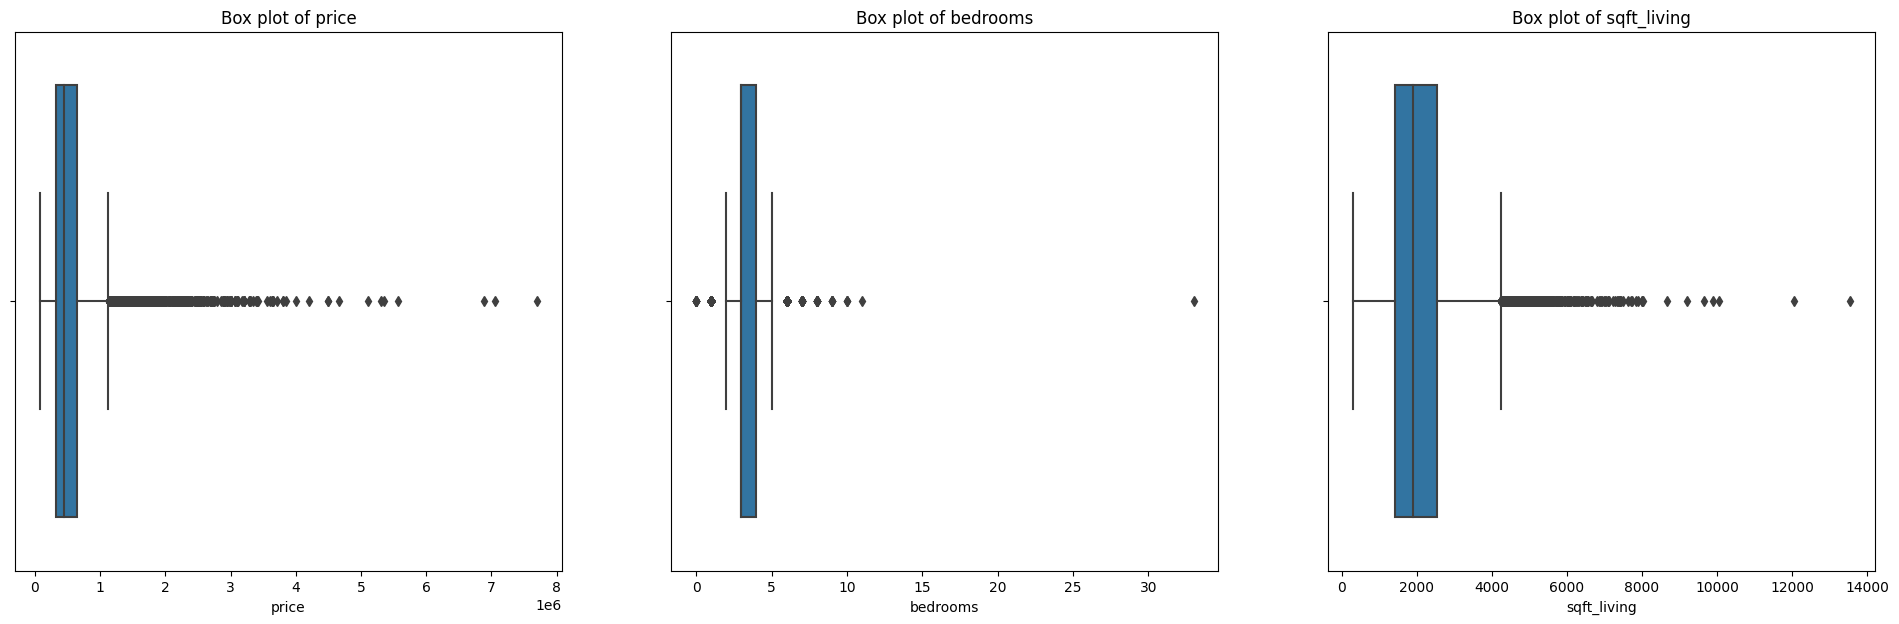

In [142]:
f, axes = plt.subplots(1, 3, figsize=(24, 7))

sns.boxplot(x=house['price'], ax=axes[0])
axes[0].set_title('Box plot of price')

sns.boxplot(x=house['bedrooms'], ax=axes[1])
axes[1].set_title('Box plot of bedrooms')

sns.boxplot(x=house['sqft_living'], ax=axes[2])
axes[2].set_title('Box plot of sqft_living')

plt.show()

I did not chooes to drop outliers here because it is acceptable that some houses are extra luxurious and it is not necessary to drop them. 

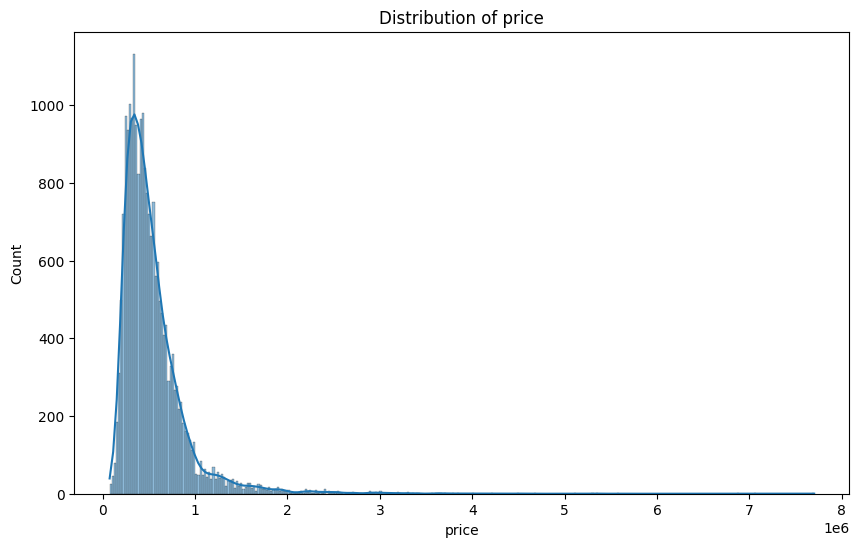

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(house['price'], kde=True)
plt.title('Distribution of price')
plt.show()

In [144]:
x = house['sqft_living']
y = house['price']

In [145]:
results = ols("price ~ sqft_living + sqft_lot + grade + house_age", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     8231.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:04:15   Log-Likelihood:            -2.9760e+05
No. Observations:               21613   AIC:                         5.952e+05
Df Residuals:                   21608   BIC:                         5.953e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.084e+06   1.46e+04    -74.071      

There is a note of OLS result saying that "This might indicate that there are strong multicollinearity or other numerical problems". 

Therefore we know that OLS may not be the best model to fit and we need to change to other model.

In [146]:
"y_hat = -1108000 + 179.3015sqft_living - 0.1937sqft_lot + 143000grade + 3662.1023house_age "

'y_hat = -1108000 + 179.3015sqft_living - 0.1937sqft_lot + 143000grade + 3662.1023house_age '

In [147]:
-110800 + (179.3015*1180) - (0.1937*5650) + (14300*7) + (3662.1023*59)

415845.4007

In [148]:
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,house_age
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,59
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,63
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,82
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,49
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,28


In [149]:
pred_vals = results.predict(house[['sqft_living','sqft_lot','grade', 'house_age']])
pred_vals

0        343623.595830
1        608234.812504
2        210103.782168
3        447607.073990
4        462570.682092
             ...      
21608    352850.411556
21609    477640.149134
21610    117997.895285
21611    387153.654147
21612    121719.934074
Length: 21613, dtype: float64

In [150]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']], axis=1)
res

,y_hat,price
0,343623.595830,221900.0
1,608234.812504,538000.0
2,210103.782168,180000.0
3,447607.073990,604000.0
4,462570.682092,510000.0
...,...,...
21608,352850.411556,360000.0
21609,477640.149134,400000.0
21610,117997.895285,402101.0
21611,387153.654147,400000.0


In [151]:
res['error'] = res['y_hat'] - res['price']
res.head()

,y_hat,price,error
0,343623.595830,221900.0,121723.595830
1,608234.812504,538000.0,70234.812504
2,210103.782168,180000.0,30103.782168
3,447607.073990,604000.0,-156392.926010
4,462570.682092,510000.0,-47429.317908


In [152]:
res['sq_error'] = res['error']**2
np.sqrt(res['sq_error'].mean())

231092.6651701355

In [153]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,house_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652,2014.322954,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631,0.467616,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,2014.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,2014.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,2015.000000,115.000000


(array([3.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 2.800e+01, 8.600e+01,
        4.210e+02, 1.465e+04, 6.394e+03, 2.300e+01]),
 array([-4503510.34068344, -3928216.44028923, -3352922.53989502,
        -2777628.63950081, -2202334.7391066 , -1627040.83871238,
        -1051746.93831817,  -476453.03792396,    98840.86247025,
          674134.76286446,  1249428.66325867]),
 <BarContainer object of 10 artists>)

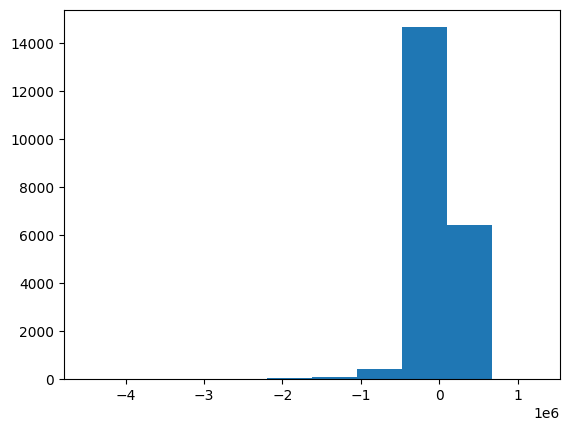

In [154]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

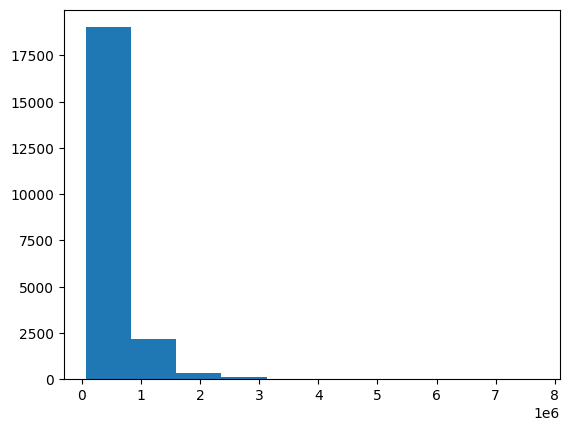

In [155]:
plt.hist(house['price'])

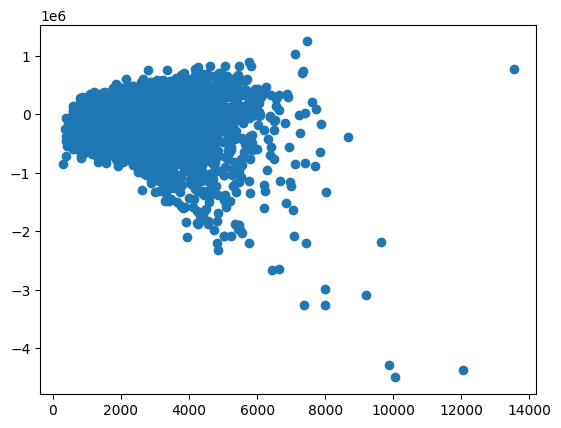

In [156]:
plt.scatter(house['sqft_living'],res['error'])

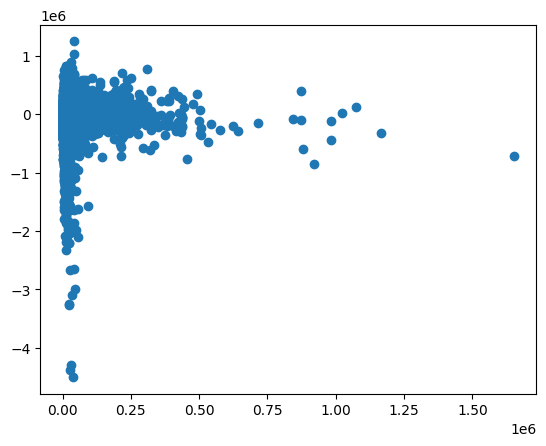

In [157]:
plt.scatter(house['sqft_lot'],res['error'])

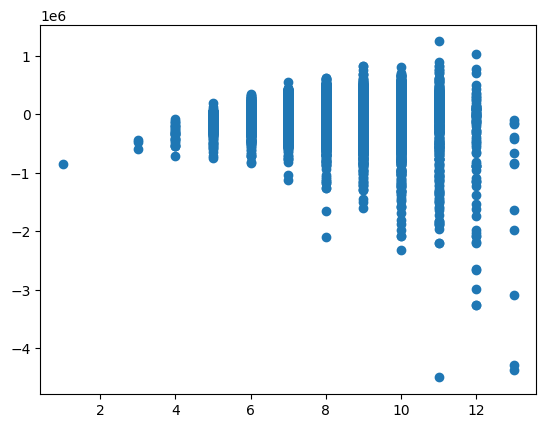

In [158]:
plt.scatter(house['grade'],res['error'])

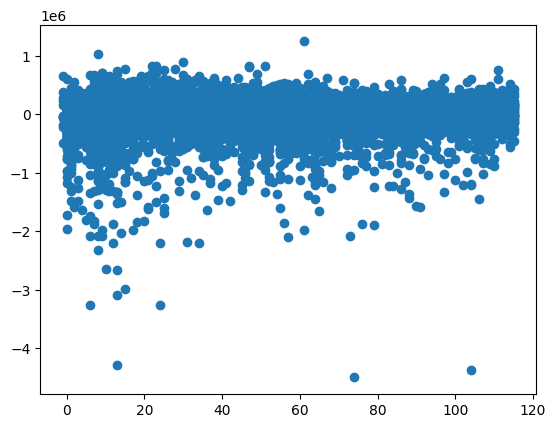

In [159]:
plt.scatter(house['house_age'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4503510.34068344, -4381131.64824259, -4289181.07784271, ...,
           890872.24892647,  1033660.0275623 ,  1249428.66325867])),
 (207848.86770171887, 4.014592541507352e-09, 0.89925774871693))

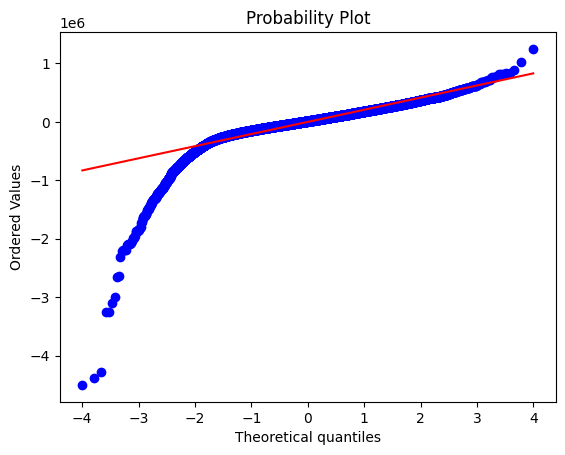

In [125]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [126]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_sqft_lot  dfb_grade  dfb_house_age   
0           0.000273         0.003062      0.000175  -0.001398      -0.001257  \
1          -0.001960        -0.003096      0.000674   0.002646      -0.000846   
2          -0.000369         0.000518     -0.000104   0.000179      -0.000700   
3           0.003470         0.002250     -0.001132  -0.003238      -0.000383   
4          -0.000468        -0.001371     -0.000100   0.001081      -0.000555   
...              ...              ...           ...        ...            ...   
21608       0.000006        -0.000248     -0.000045   0.000140      -0.000266   
21609      -0.001667        -0.000314      0.000637   0.000801       0.003359   
21610       0.007697        -0.008617     -0.001119  -0.000844      -0.014186   
21611      -0.000016        -0.000406     -0.000075   0.000247      -0.000394   
21612       0.005384        -0.006169     -0.000839  -0.000529      -0.009923   

            cooks_d  standa

In [127]:
infl.summary_frame()

,dfb_Intercept,dfb_sqft_living,dfb_sqft_lot,dfb_grade,dfb_house_age,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.000273,0.003062,0.000175,-0.001398,-0.001257,5.573196e-06,-0.526696,0.000100,-0.005279,-0.526687,-0.005279
1,-0.001960,-0.003096,0.000674,0.002646,-0.000846,3.240486e-06,-0.303916,0.000175,-0.004025,-0.303910,-0.004025
2,-0.000369,0.000518,-0.000104,0.000179,-0.000700,6.153781e-07,-0.130264,0.000181,-0.001754,-0.130261,-0.001754
3,0.003470,0.002250,-0.001132,-0.003238,-0.000383,6.731176e-06,0.676701,0.000073,0.005801,0.676692,0.005801
4,-0.000468,-0.001371,-0.000100,0.001081,-0.000555,8.900719e-07,0.205226,0.000106,0.002110,0.205222,0.002110
...,...,...,...,...,...,...,...,...,...,...,...
21608,0.000006,-0.000248,-0.000045,0.000140,-0.000266,3.845382e-08,0.030938,0.000201,0.000438,0.030937,0.000438
21609,-0.001667,-0.000314,0.000637,0.000801,0.003359,3.466781e-06,-0.335957,0.000154,-0.004163,-0.335950,-0.004163
21610,0.007697,-0.008617,-0.001119,-0.000844,-0.014186,7.652857e-05,1.229404,0.000253,0.019561,1.229418,0.019561
21611,-0.000016,-0.000406,-0.000075,0.000247,-0.000394,1.010289e-07,0.055588,0.000163,0.000711,0.055586,0.000711


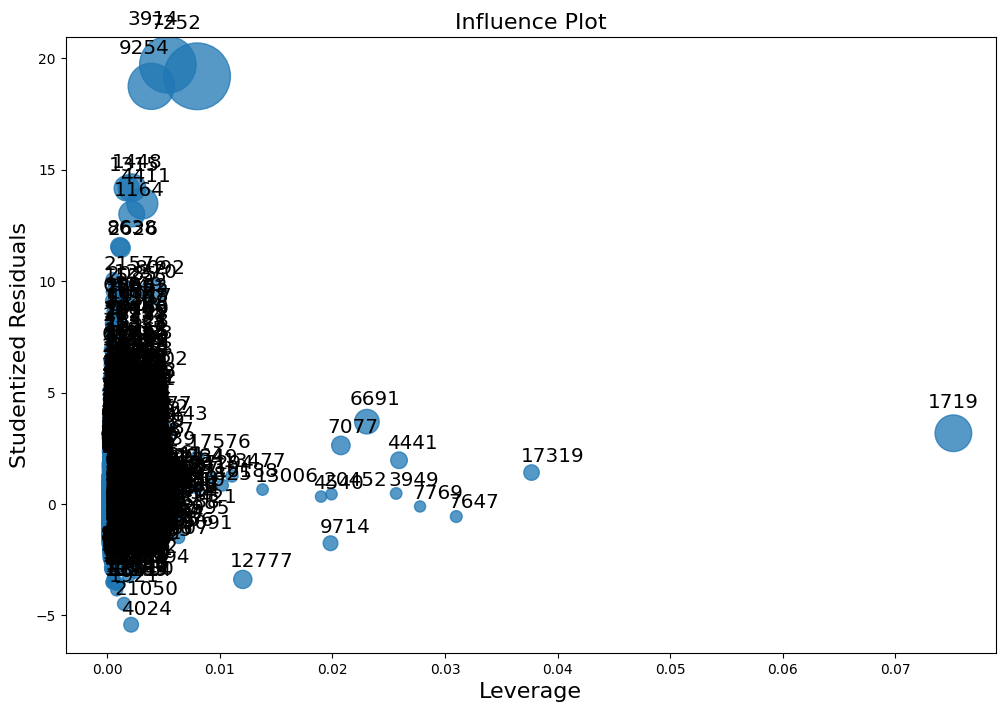

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [160]:
house['renovated'] = house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
house.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,house_age,renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,59,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,63,1
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,82,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,49,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,28,0


In [161]:
house['has_waterfront'] = house['waterfront'].apply(lambda x: 1 if x > 0 else 0)
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,house_age,renovated,has_waterfront
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,1340,5650,2014,59,0,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,1690,7639,2014,63,1,0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,2720,8062,2015,82,0,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,1360,5000,2014,49,0,0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,1800,7503,2015,28,0,0


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [207]:
# separate features and target
categorical_features = ['has_waterfront','renovated','view']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade','house_age']
target = 'price'

In [208]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [209]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [210]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [211]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [212]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['has_waterfront',
                                                   'renovated', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'grade', 'house_age'])])),
                ('regressor', LinearRegression())])

In [213]:
pred = linear_regression.predict(X_test)
pred

array([ 541888.,  609664., 1068096., ...,  554656.,  541568.,  405280.])

In [214]:
from sklearn.metrics import mean_squared_error

In [215]:
np.sqrt(mean_squared_error(pred,y_test))

211986.6380885577

In [216]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [217]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['has_waterfront',
                                                   'renovated', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'grade', 'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [218]:
pred_ridge = ridge_regression.predict(X_test)

In [219]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

211988.2160843887

In [220]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])


In [221]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['has_waterfront',
                                                   'renovated', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'grade', 'house_age'])])),
                ('regressor', Lasso())])

In [222]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))

212008.6802760799

In [223]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [224]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['has_waterfront',
                                                   'renovated', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'condition',
                                                   'grade', 'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [225]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

221935.27878782005

In [231]:
# Define features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'house_age']
target = 'price'

# Scale the features
scaler = StandardScaler()
house[features] = scaler.fit_transform(house[features])

# Split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house[features], house[target], test_size = 0.3, random_state=1234)

# Define the Ridge regression model
model = Ridge(alpha=3.0)

# Fit the model
model.fit(X_train, y_train)

# Get coefficients
coefficients = model.coef_

# Combine feature names and coefficients into a dataframe
coeff_df = pd.DataFrame({'feature': features, 'coefficient': coefficients})

# Sort the dataframe by the absolute value of the coefficients
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df = coeff_df.sort_values('abs_coefficient', ascending=False)

# Display the dataframe
print(coeff_df)

       feature    coefficient  abs_coefficient
2  sqft_living  174156.253475    174156.253475
6        grade  153880.775877    153880.775877
7    house_age  117959.084610    117959.084610
0     bedrooms  -44715.813970     44715.813970
1    bathrooms   38402.008103     38402.008103
4       floors   13051.685398     13051.685398
5    condition   12803.213687     12803.213687
3     sqft_lot  -12519.164273     12519.164273


1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net. Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.


Based on the results of error, we can see that both linear and ridge regression have relatively lower error. However, Ridge Regression can better deal with the issue of multicollinearity (previously mentioned in the ols results). When there's a high degree of correlation among the independent variables in the model, Ordinary Least Squares (OLS) may fail or produce unstable parameter estimates. Ridge Regression, on the other hand, can mitigate the impact of multicollinearity by shrinking the coefficients while keeping all variables in the model.

Therefore I will choose RIDGE regression to forecast the house price.

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?



I started with regular data cleaning, however, this data set is pretty clean and there was no missing or empty value. There was also no duplicates. I later dropped id, zip code, lat, long as they are general irrelavant columns and their information does not contribute to any of the changes to future regression model. (even though zip code may display a price trend certain areas)

I created a new column named house_age because I thought that the age of house may often affect the price of house as many people loves new houses and I'm going to put it in the ols regression. 

In the OLS regression I could have a basic understanding of how some variables were affecting the results. Notabally that note from results indicated that there was a strong multicolinearity between some of the variables, which also later made me choose not to use the OLS regression model to evaluate the coefficient. Later we could see the error was relatively small and not affecting the whole model using scatter plot and histogram. 

In the qqplot and influence plot, the error were also relatively small. And the data points mostly fits the theoretical distribution. 

I later add renovated and has_waterview as two dummy variables (later categorical) because they are good non-numerical indicators.

The last thing I did was to set up the model using different regressions. As a result, linear and ridge regression both have relatively small error, but as the multicolinearity was a problem, I chose ridge regression finally. 

In the end, calculated with ridge regression, I got the coefficient of some major variables and the top 3 main drivers are sqft_living, grade and house_age. The detailed analysis is listed in Q3.

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?



In this part, I choose not to include sqft_above/basement/living15/lot15. Because I think that sqft_above/basement columns have some overlap with sqft_living and sqft_lot, adding them may cause a strong multicolinearity. 

Also, sqft_living15 and lot15 mean "Average size of interior housing living space for the closest 15 houses, in square feet" and "Average size of land lots for the closest 15 houses, in square feet". I think it's really weird to consider the area of nearby houses as a indicator to evaluate house price. Therefore I would not include them either. I understand in real world nearby community quality do affect house price, but it's not normal to consider how big they are. 

Based on the results of our Ridge Regression model, the top 3 main drivers of house prices in King City are:

**Living Area (sqft_living)**: The model indicates that living area is the most significant factor affecting house prices. With a coefficient of 174156, it suggests that for each standard deviation increase in living area, the house price is expected to increase by about $174,156. This makes sense as larger houses are generally more expensive than smaller ones.

**Building Quality Grade (grade)**: The building quality grade is also a significant factor influencing house prices. With a coefficient of 153880, it implies that for each standard deviation increase in the building quality grade, the house price is expected to increase by about $153,880. This indicates that houses of higher quality are usually more expensive than those of lower quality.

**House Age (house_age)**: The age of the house significantly affects the house prices. With a coefficient of 117959, it suggests that for each standard deviation increase in house age, the house price is expected to increase by about $117,959. This is weird becuase usually older houses are expected to be less expensive, but based on our model, older house became even more expensive. Possible reasons may be that some older houses might be located in historically significant neighborhoods, or possess unique architectural styles, which could add to their value. 

other variables that have relatively more impact on prices are:

**Number of Bedrooms (bedrooms)**: The influence of the number of bedrooms on the house price is relatively small. With a coefficient of -44715, it implies that for each standard deviation increase in the number of bedrooms, the house price is expected to decrease by about $44,715. This result might be because in some cases, an excessive number of bedrooms could lead to a decrease in the area of other parts of the house (such as public activity areas), thus negatively affecting the house price.

**Number of Bathrooms (bathrooms)**: The influence of the number of bathrooms on the house price is also relatively small. With a coefficient of 38402, it suggests that for each standard deviation increase in the number of bathrooms, the house price is expected to increase by about $38,402. This might be because an increase in the number of bathrooms can improve the comfort of the house, thus positively affecting the house price.

Other factors such as, floor, condition, both have a positive impact on price, which means more floor and better condition will increase house price. An increase in sqft area of lot will decrease the value of house.